In [1]:
pip install -q "transformers>=4.40,<5" "evaluate>=0.4" "accelerate>=0.30" "seqeval>=1.2.2" "datasets>=2.18"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 187.3 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 303.7 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 398.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 26.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 4.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 10.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 949.6 kB/s eta 0:00:000:0100:05m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 

# 📁 Cell 1 

In [2]:
# Modify the dataset loading section for Bengali (BN), using the correct path for the Bengali test set

import shutil
from pathlib import Path

# Define the paths where Kaggle has stored the input data
KAGGLE_INPUTS = Path("/kaggle/input/universal-dependencies")
KAGGLE_BENGALI_INPUTS = Path("/kaggle/input/ud-bengali")  # Specific path for Bengali files

# Expected file names from the pipeline config
NEEDED = [
    "en_ewt-ud-train.conllu", "en_ewt-ud-dev.conllu", "en_ewt-ud-test.conllu",   # English files
    "hi_hdtb-ud-train.conllu", "hi_hdtb-ud-dev.conllu", "hi_hdtb-ud-test.conllu",  # Hindi files
    "ur_udtb-ud-train.conllu", "ur_udtb-ud-dev.conllu", "ur_udtb-ud-test.conllu",    # Urdu files
    "bn_bru-ud-test.conllu",  # Correct Bengali test file path from /kaggle/input/ud-bengali
]

# Directory where we will store the files in the working environment
BASE_DIR = Path("./ud_data")
BASE_DIR.mkdir(parents=True, exist_ok=True)

# Function to copy required files from the Kaggle input directory to the local working directory
def copy_if_found(fname, source_path):
    dest = BASE_DIR / fname
    if dest.exists():
        return True  # File already exists, no need to copy
    # Check the Kaggle input path for the required file
    source_file = source_path / fname  # Directly reference the file name in the correct folder
    if source_file.exists():
        shutil.copy2(source_file, dest)  # Copy the file to the destination folder
        print(f"Copied: {source_file} -> {dest}")
        return True
    return False

# Check for missing files and copy them from the Kaggle input path
missing = []
for fname in NEEDED:
    # If the file is Bengali, check the specific Bengali folder
    if "bn_bru" in fname:
        ok = copy_if_found(fname, KAGGLE_BENGALI_INPUTS)
    else:
        ok = copy_if_found(fname, KAGGLE_INPUTS)
    
    if not ok:
        missing.append(fname)

# If any files are still missing, print a message
if missing:
    print("Still missing these files (add a dataset that contains them or upload manually):")
    for m in missing:
        print(" -", m)
else:
    print("All required UD files copied into", BASE_DIR.resolve())


Copied: /kaggle/input/universal-dependencies/en_ewt-ud-train.conllu -> ud_data/en_ewt-ud-train.conllu
Copied: /kaggle/input/universal-dependencies/en_ewt-ud-dev.conllu -> ud_data/en_ewt-ud-dev.conllu
Copied: /kaggle/input/universal-dependencies/en_ewt-ud-test.conllu -> ud_data/en_ewt-ud-test.conllu
Copied: /kaggle/input/universal-dependencies/hi_hdtb-ud-train.conllu -> ud_data/hi_hdtb-ud-train.conllu
Copied: /kaggle/input/universal-dependencies/hi_hdtb-ud-dev.conllu -> ud_data/hi_hdtb-ud-dev.conllu
Copied: /kaggle/input/universal-dependencies/hi_hdtb-ud-test.conllu -> ud_data/hi_hdtb-ud-test.conllu
Copied: /kaggle/input/universal-dependencies/ur_udtb-ud-train.conllu -> ud_data/ur_udtb-ud-train.conllu
Copied: /kaggle/input/universal-dependencies/ur_udtb-ud-dev.conllu -> ud_data/ur_udtb-ud-dev.conllu
Copied: /kaggle/input/universal-dependencies/ur_udtb-ud-test.conllu -> ud_data/ur_udtb-ud-test.conllu
Copied: /kaggle/input/ud-bengali/bn_bru-ud-test.conllu -> ud_data/bn_bru-ud-test.conllu


# 🧱 Cell 2 — Load CoNLL-U, build UPOS vocab

In [3]:
from typing import List, Tuple, Dict
from pathlib import Path

# Languages for training and zero-shot BN test
TRAIN_LANGS = ["en_ewt", "hi_hdtb", "ur_udtb"]
ZERO_SHOT_TEST_LANG = "bn_bcc"  # our BN key (file is bn_bru-ud-test.conllu)

# Where files live now (copied by Cell 1)
BASE_DIR = Path("./ud_data")

# Local filenames inside BASE_DIR
UD_LOCAL = {
    "en_ewt": {"train": "en_ewt-ud-train.conllu", "dev": "en_ewt-ud-dev.conllu", "test": "en_ewt-ud-test.conllu"},
    "hi_hdtb": {"train": "hi_hdtb-ud-train.conllu", "dev": "hi_hdtb-ud-dev.conllu", "test": "hi_hdtb-ud-test.conllu"},
    "ur_udtb": {"train": "ur_udtb-ud-train.conllu", "dev": "ur_udtb-ud-dev.conllu", "test": "ur_udtb-ud-test.conllu"},
    "bn_bcc": {"test": "bn_bru-ud-test.conllu"},
}

# -------- CoNLL-U reader (UPOS only for POS task) ----------
def read_conllu_upos(path: Path) -> List[Tuple[List[str], List[str]]]:
    sents = []
    words, upos = [], []
    with path.open("r", encoding="utf-8") as f:
        for line in f:
            line = line.rstrip("\n")
            if not line:
                if words:
                    sents.append((words, upos))
                    words, upos = [], []
                continue
            if line.startswith("#"):
                continue
            parts = line.split("\t")
            if len(parts) != 10:
                continue
            idx = parts[0]
            if "-" in idx or "." in idx:  # skip multiword & empty nodes
                continue
            form = parts[1]
            upos_tag = parts[3]  # UPOS column for POS tagging
            words.append(form)
            upos.append(upos_tag)
    if words:
        sents.append((words, upos))
    return sents

def load_split(lang_key: str, split: str) -> List[Tuple[List[str], List[str]]]:
    assert lang_key in UD_LOCAL, f"Unknown lang '{lang_key}'"
    assert split in UD_LOCAL[lang_key], f"No split '{split}' for {lang_key}"
    path = BASE_DIR / UD_LOCAL[lang_key][split]
    if not path.exists():
        raise FileNotFoundError(f"Missing {path}. Put/copy file there.")
    return read_conllu_upos(path)

def build_upos_vocab(lang_keys: List[str]) -> Tuple[Dict[str,int], List[str]]:
    tagset = set()
    for lk in lang_keys:
        for sp in UD_LOCAL[lk]:
            for _, tags in load_split(lk, sp):
                tagset.update(tags)
    id2tag = sorted(tagset)
    tag2id = {t:i for i,t in enumerate(id2tag)}
    return tag2id, id2tag

# Build UPOS vocab from train langs + BN test
tag2id, id2tag = build_upos_vocab(TRAIN_LANGS + [ZERO_SHOT_TEST_LANG])
NUM_TAGS = len(id2tag)
print("NUM_TAGS:", NUM_TAGS)
print("UPOS tags:", id2tag)


NUM_TAGS: 17
UPOS tags: ['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X']


# 🧰 Cell 3 — Dataset + tokenization (proper subword alignment)

In [4]:
import numpy as np
import torch
from torch.utils.data import Dataset
from transformers import AutoTokenizer

MODEL_NAME = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
IGNORE_INDEX = -100

class UDDatasetPOS(torch.utils.data.Dataset):
    def __init__(self, sents, tokenizer, tag2id, max_length=256):
        self.sents = sents
        self.tokenizer = tokenizer
        self.tag2id = tag2id
        self.max_length = max_length

    def __len__(self): return len(self.sents)

    def __getitem__(self, idx):
        words, tags = self.sents[idx]
        enc = self.tokenizer(
            words,
            is_split_into_words=True,
            truncation=True,
            max_length=self.max_length
        )
        word_ids = enc.word_ids()
        labels = []
        prev_wid = None
        for wid in word_ids:
            if wid is None:
                labels.append(IGNORE_INDEX)
            else:
                if wid != prev_wid:
                    labels.append(self.tag2id[tags[wid]])  # first subword
                else:
                    labels.append(IGNORE_INDEX)             # non-first subword
            prev_wid = wid
        enc["labels"] = labels
        return {k: torch.tensor(v) for k, v in enc.items()}

def concat_splits(lang_keys, split):
    out = []
    for lk in lang_keys:
        if split in UD_LOCAL[lk]:
            out += load_split(lk, split)
    return out

# Build datasets
train_sents = concat_splits(TRAIN_LANGS, "train")
dev_sents   = concat_splits(TRAIN_LANGS, "dev")     # combined EN+HI+UR dev
bn_test_sents = load_split(ZERO_SHOT_TEST_LANG, "test")

print(f"Train:{len(train_sents)}  Dev:{len(dev_sents)}  BN-test:{len(bn_test_sents)}")

train_ds = UDDatasetPOS(train_sents, tokenizer, tag2id)
dev_ds   = UDDatasetPOS(dev_sents, tokenizer, tag2id)
bn_test_ds = UDDatasetPOS(bn_test_sents, tokenizer, tag2id)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Train:29893  Dev:4212  BN-test:56


# 🧪 Cell 4 — BN before training baseline

In [5]:
import random, os
import evaluate
from transformers import AutoConfig, AutoModelForTokenClassification, DataCollatorForTokenClassification, Trainer, TrainingArguments

def set_seed(seed=42):
    random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
    if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)
set_seed(42)

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

ARTIFACTS = Path("./artifacts_pos_xlmr")
(ARTIFACTS / "checkpoints_xlmr").mkdir(parents=True, exist_ok=True)

config = AutoConfig.from_pretrained(
    MODEL_NAME,
    num_labels=NUM_TAGS,
    id2label={i:t for i,t in enumerate(id2tag)},
    label2id={t:i for i,t in enumerate(id2tag)},
)

model_untrained = AutoModelForTokenClassification.from_pretrained(MODEL_NAME, config=config).to(DEVICE)

seqeval = evaluate.load("seqeval")

def compute_metrics(pred):
    logits = pred.predictions
    labels = pred.label_ids
    preds = np.argmax(logits, axis=-1)

    # Collect token-level lists
    true_labels, true_preds = [], []
    for p_row, l_row in zip(preds, labels):
        tl, pl = [], []
        for p, l in zip(p_row, l_row):
            if l == IGNORE_INDEX:
                continue
            tl.append(id2tag[l])
            pl.append(id2tag[p])
        true_labels.append(tl)
        true_preds.append(pl)

    # Token accuracy
    total = sum(len(tl) for tl in true_labels)
    correct = sum(sum(1 for a,b in zip(tl,pl) if a==b) for tl,pl in zip(true_labels,true_preds))
    token_acc = correct / max(total, 1)

    # seqeval overall f1
    results = seqeval.compute(predictions=true_preds, references=true_labels, zero_division=0)
    f1 = results.get("overall_f1", 0.0)
    return {"token_accuracy": token_acc, "f1": f1}

data_collator = DataCollatorForTokenClassification(tokenizer)

trainer_untrained = Trainer(
    model=model_untrained,
    args=TrainingArguments(
        output_dir=str(ARTIFACTS / "debug_untrained"),
        per_device_eval_batch_size=32,
        dataloader_num_workers=2,
        report_to=[],
    ),
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

bn_before = trainer_untrained.evaluate(bn_test_ds)
print("BN test BEFORE training:", bn_before)

import json
with open(ARTIFACTS / "metrics_bn_before.json", "w") as f:
    json.dump(bn_before, f, indent=2)


2025-09-26 10:59:29.057893: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758884369.401405      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758884369.500061      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/tmp/ipykernel_36/154265661.py:55: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_untrained = Trainer(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


BN test BEFORE training: {'eval_loss': 2.8665363788604736, 'eval_token_accuracy': 0.00625, 'eval_f1': 0.006622516556291391, 'eval_runtime': 1.8645, 'eval_samples_per_second': 30.035, 'eval_steps_per_second': 0.536}


/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PRON seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: VERB seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PART seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PUNCT seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: NOUN seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:17

# 🏋️ Cell 5 — Train EN+HI+UR → eval on combined dev → save best and final

In [7]:
from transformers import EarlyStoppingCallback

set_seed(42)

model = AutoModelForTokenClassification.from_pretrained(MODEL_NAME, config=config).to(DEVICE)

train_args = TrainingArguments(
    output_dir=str(ARTIFACTS / "xlmr_pos"),
    eval_strategy="steps",
    eval_steps=1000,
    save_steps=1000,
    logging_steps=100,
    save_total_limit=2,
    metric_for_best_model="f1",
    greater_is_better=True,
    load_best_model_at_end=True,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    gradient_accumulation_steps=2,
    num_train_epochs=6,             # adjust higher if you have time/GPU
    learning_rate=2e-5,
    weight_decay=0.01,
    warmup_ratio=0.06,
    fp16=torch.cuda.is_available(),
    report_to=[],
)

trainer = Trainer(
    model=model,
    args=train_args,
    train_dataset=train_ds,
    eval_dataset=dev_ds,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3, early_stopping_threshold=1e-4)],
)

train_out = trainer.train()
print("Training finished.")

dev_best = trainer.evaluate(dev_ds)
print("Combined Dev metrics (best):", dev_best)

# Save BEST (the currently loaded model is best due to load_best_model_at_end=True)
BEST_DIR = ARTIFACTS / "checkpoints_xlmr" / "best-EN+HI+UR-xlmr"
BEST_DIR.mkdir(parents=True, exist_ok=True)
trainer.model.save_pretrained(BEST_DIR)
tokenizer.save_pretrained(BEST_DIR)
config.save_pretrained(BEST_DIR)

# Save FINAL snapshot too (current state == best; still save a separate folder for clarity)
FINAL_DIR = ARTIFACTS / "checkpoints_xlmr" / "final-EN+HI+UR-xlmr"
FINAL_DIR.mkdir(parents=True, exist_ok=True)
trainer.save_model(FINAL_DIR)
tokenizer.save_pretrained(FINAL_DIR)
config.save_pretrained(FINAL_DIR)

# Persist logs for plotting
import numpy as np, json
np.save(ARTIFACTS / "train_log_history.npy", np.array(trainer.state.log_history, dtype=object))
with open(ARTIFACTS / "metrics_dev_best.json", "w") as f:
    json.dump(dev_best, f, indent=2)


Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_36/1340578147.py:28: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Token Accuracy,F1
1000,0.086300,0.090258,0.972486,0.966131
2000,0.055300,0.087027,0.974314,0.968067


/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: ADP seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: DET seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PROPN seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: VERB seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: NOUN seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171:

Training finished.


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: ADP seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: DET seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PROPN seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: VERB seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: NOUN seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171:

Combined Dev metrics (best): {'eval_loss': 0.08702674508094788, 'eval_token_accuracy': 0.9743144972980186, 'eval_f1': 0.9680672521881796, 'eval_runtime': 18.0225, 'eval_samples_per_second': 233.707, 'eval_steps_per_second': 3.662, 'epoch': 6.0}


# 🔁 Cell 6 — Re-test final/best on BN

In [8]:
# (trainer.model is already the best model due to load_best_model_at_end=True)
bn_after = trainer.evaluate(bn_test_ds)
print("BN test AFTER training:", bn_after)

import json
with open(ARTIFACTS / "metrics_bn_after.json", "w") as f:
    json.dump(bn_after, f, indent=2)


BN test AFTER training: {'eval_loss': 0.6656767725944519, 'eval_token_accuracy': 0.8625, 'eval_f1': 0.8231173380035026, 'eval_runtime': 0.2179, 'eval_samples_per_second': 256.942, 'eval_steps_per_second': 4.588, 'epoch': 6.0}


# 📊 Cell 7 — Comparisons + Plots

=== SUMMARY (UPOS) ===
BN test BEFORE | Acc: 0.0063  F1: 0.0066
BN test AFTER  | Acc: 0.8625   F1: 0.8231
DEV (EN+HI+UR) | Acc: 0.9743    F1: 0.9681


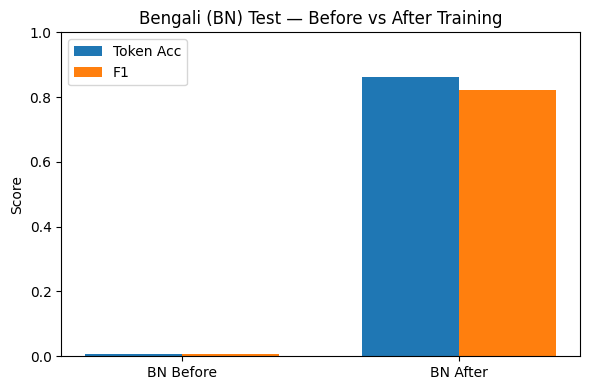

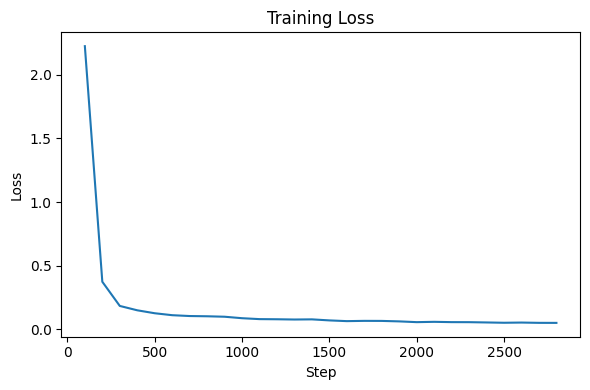

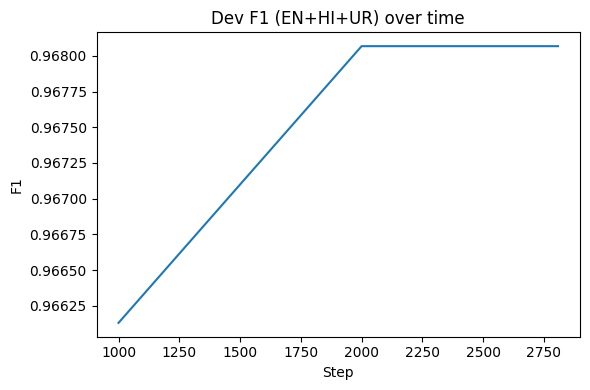

In [9]:
import json, numpy as np, matplotlib.pyplot as plt
from pathlib import Path

ARTIFACTS = Path("./artifacts_pos_xlmr")

with open(ARTIFACTS / "metrics_bn_before.json") as f: bn_before = json.load(f)
with open(ARTIFACTS / "metrics_bn_after.json")  as f: bn_after  = json.load(f)
with open(ARTIFACTS / "metrics_dev_best.json")  as f: dev_best  = json.load(f)

print("=== SUMMARY (UPOS) ===")
print(f"BN test BEFORE | Acc: {bn_before['eval_token_accuracy']:.4f}  F1: {bn_before['eval_f1']:.4f}")
print(f"BN test AFTER  | Acc: {bn_after['eval_token_accuracy']:.4f}   F1: {bn_after['eval_f1']:.4f}")
print(f"DEV (EN+HI+UR) | Acc: {dev_best['eval_token_accuracy']:.4f}    F1: {dev_best['eval_f1']:.4f}")

# ---- Plot BN Before vs After (Acc & F1)
labels = ["BN Before", "BN After"]
accs = [bn_before["eval_token_accuracy"], bn_after["eval_token_accuracy"]]
f1s  = [bn_before["eval_f1"], bn_after["eval_f1"]]

plt.figure(figsize=(6,4))
x = np.arange(len(labels))
w = 0.35
plt.bar(x - w/2, accs, width=w, label="Token Acc")
plt.bar(x + w/2, f1s,  width=w, label="F1")
plt.title("Bengali (BN) Test — Before vs After Training")
plt.xticks(x, labels)
plt.ylim(0, 1.0)
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.savefig(ARTIFACTS / "plot_bn_before_after.png", dpi=160)
plt.show()

# ---- Plot training curves from trainer log
try:
    logs = np.load(ARTIFACTS / "train_log_history.npy", allow_pickle=True).tolist()
except:
    logs = []

steps_loss, loss_vals = [], []
eval_steps, eval_f1s, eval_accs = [], [], []

for rec in logs:
    if "loss" in rec and "step" in rec:
        steps_loss.append(rec["step"])
        loss_vals.append(rec["loss"])
    if "eval_f1" in rec and "step" in rec:
        eval_steps.append(rec["step"])
        eval_f1s.append(rec["eval_f1"])
    if "eval_token_accuracy" in rec and "step" in rec:
        # align lengths if needed; only used for plotting range
        pass

if loss_vals:
    plt.figure(figsize=(6,4))
    plt.plot(steps_loss, loss_vals)
    plt.title("Training Loss")
    plt.xlabel("Step")
    plt.ylabel("Loss")
    plt.tight_layout()
    plt.savefig(ARTIFACTS / "plot_train_loss.png", dpi=160)
    plt.show()

if eval_steps and eval_f1s:
    plt.figure(figsize=(6,4))
    plt.plot(eval_steps, eval_f1s)
    plt.title("Dev F1 (EN+HI+UR) over time")
    plt.xlabel("Step")
    plt.ylabel("F1")
    plt.tight_layout()
    plt.savefig(ARTIFACTS / "plot_dev_f1.png", dpi=160)
    plt.show()


In [10]:
# ========= Manual POS tagging from a saved model (BEST or FINAL) =========
from pathlib import Path
import torch
import numpy as np
from transformers import AutoTokenizer, AutoConfig, AutoModelForTokenClassification

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
IGNORE_INDEX = -100

# --- Choose which checkpoint to load ---
ARTIFACTS = Path("./artifacts_pos_xlmr")
MODEL_DIR = ARTIFACTS / "checkpoints_xlmr" / "best-EN+HI+UR-xlmr"   # or "final-EN+HI+UR-xlmr"

assert MODEL_DIR.exists(), f"Model directory not found: {MODEL_DIR}"

# Load model + tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL_DIR)
config    = AutoConfig.from_pretrained(MODEL_DIR)
model     = AutoModelForTokenClassification.from_pretrained(MODEL_DIR, config=config).to(DEVICE)
model.eval()

# Build id2tag from config (robust across versions)
if hasattr(config, "id2label") and isinstance(config.id2label, dict):
    # Ensure index order
    id2tag = [config.id2label[i] for i in range(len(config.id2label))]
else:
    raise ValueError("Config has no id2label mapping; cannot decode tags.")

tag2id = {t:i for i,t in enumerate(id2tag)}

@torch.no_grad()
@torch.no_grad()
def tag_tokens(tokens, max_length=256):
    """
    Tag a list of whitespace tokens and return per-token UPOS.
    Returns: list[(token, upos)]
    """
    # Keep the BatchEncoding so we can call .word_ids()
    batch = tokenizer(
        tokens,
        is_split_into_words=True,
        return_tensors="pt",
        truncation=True,
        max_length=max_length,
    )

    # Get alignment BEFORE converting to a plain dict
    word_map = batch.word_ids(batch_index=0)  # list of word index or None

    # Now make a tensors dict for the forward pass
    inputs = {k: v.to(DEVICE) for k, v in batch.items()}

    outputs = model(**inputs)
    logits = outputs.logits[0].detach().cpu().numpy()  # (seq_len, num_labels)

    # First-subword position for each word id
    first_subword_pos = {}
    for pos, wid in enumerate(word_map):
        if wid is None:
            continue
        if wid not in first_subword_pos:  # first subword we see for this word
            first_subword_pos[wid] = pos

    # How many words did the tokenizer keep (in case of truncation)
    last_wid = max((w for w in word_map if w is not None), default=-1)
    kept = min(len(tokens), last_wid + 1 if last_wid >= 0 else 0)

    out = []
    for wid in range(kept):
        pos = first_subword_pos.get(wid, None)
        if pos is None:
            # fallback (shouldn't happen often): use the first real token logit
            pred_id = int(np.argmax(logits[0]))
        else:
            pred_id = int(np.argmax(logits[pos]))
        out.append((tokens[wid], id2tag[pred_id]))
    return out


def _simple_ws_tokenize(text: str):
    # Simple whitespace split; works reasonably for EN/HI/UR/BN
    return text.strip().split()

def tag_text(text: str):
    """
    Tag a raw sentence string (whitespace tokenization).
    Returns list[(token, upos)]
    """
    toks = _simple_ws_tokenize(text)
    return tag_tokens(toks)

def print_tagged(tagged):
    """
    Pretty-print list[(token, upos)] as two columns.
    """
    width = max(len(tok) for tok,_ in tagged) if tagged else 5
    for tok, pos in tagged:
        print(f"{tok:<{width}}  {pos}")

def tag_batch(texts, max_length=256, batch_size=8):
    """
    Tag a batch of sentences (list of strings). Returns list of list[(token, upos)].
    Uses per-sample encoding to keep alignment simple & robust.
    """
    results = []
    for sent in texts:
        results.append(tag_text(sent))
    return results

# ---------- Optional: export preds to CoNLL-U (UPOS in column 4) ----------
def save_conllu_predictions(texts, out_path: str):
    """
    Save predicted UPOS tags to a minimal CoNLL-U file.
    Only fills: ID, FORM, LEMMA(_), UPOS(pred), XPOS(_), FEATS(_), HEAD(0), DEPREL(_), DEPS(_), MISC(_)
    """
    out_lines = []
    for sent in texts:
        tagged = tag_text(sent)
        for i, (w, upos) in enumerate(tagged, start=1):
            cols = [
                str(i),        # ID
                w,             # FORM
                "_",           # LEMMA
                upos,          # UPOS (pred)
                "_",           # XPOS
                "_",           # FEATS
                "0",           # HEAD (unknown here)
                "_",           # DEPREL
                "_",           # DEPS
                "_",           # MISC
            ]
            out_lines.append("\t".join(cols))
        out_lines.append("")  # sentence break

    with open(out_path, "w", encoding="utf-8") as f:
        f.write("\n".join(out_lines))
    print(f"Saved CoNLL-U predictions → {out_path}")

# ===================== EXAMPLES =====================
# 1) Single sentence (English)
example_en = "मैं अभी हिंदी में एक छोटा वाक्य लिख रहा हूँ ।."
tagged_en = tag_text(example_en)
print("EN:")
print_tagged(tagged_en)

# 2) Single sentence (Bengali)
example_bn = "। নব্য প্রস্তরযুগে এই অঞ্চলের মানুষ মাটির তলায় গর্ত তৈরি করে বা মাটির উপর ছাউনি-জাতীয় আবাসস্থল নির্মাণ করে বাস করত। "
tagged_bn = tag_text(example_bn)
print("\nBN:")
print_tagged(tagged_bn)

# 3) Batch
batch_out = tag_batch([example_en, example_bn])
# print(batch_out)  # list of per-sentence tagged tuples

# 4) Save to CoNLL-U
save_conllu_predictions([example_bn], str(ARTIFACTS / "bn_example_pred.conllu"))


EN:
मैं    PRON
अभी    PRON
हिंदी  PROPN
में    ADP
एक     NUM
छोटा   ADJ
वाक्य  NOUN
लिख    VERB
रहा    AUX
हूँ    AUX
।.     PUNCT

BN:
।             PUNCT
নব্য          ADJ
প্রস্তরযুগে   NOUN
এই            DET
অঞ্চলের       NOUN
মানুষ         NOUN
মাটির         NOUN
তলায়         NOUN
গর্ত          NOUN
তৈরি          ADJ
করে           VERB
বা            CCONJ
মাটির         NOUN
উপর           ADP
ছাউনি-জাতীয়  ADJ
আবাসস্থল      NOUN
নির্মাণ       NOUN
করে           VERB
বাস           NOUN
করত।          VERB
Saved CoNLL-U predictions → artifacts_pos_xlmr/bn_example_pred.conllu
